In [1]:
#Task 1
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_
clusters

X["Cluster"] = clusters
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


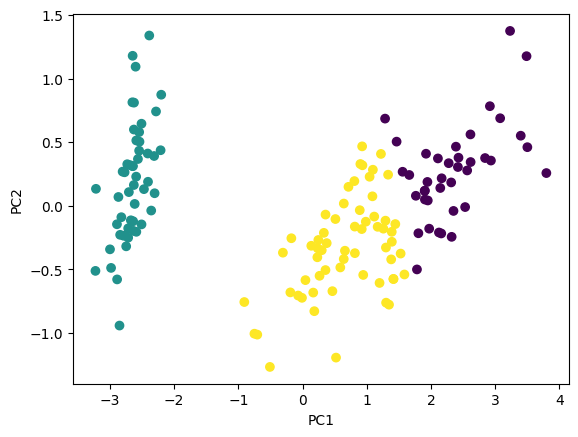

In [2]:
#Task 2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :-1])

X_pca

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [1]:
#Task 3
import pandas as pd

data = {
    'Transaction': [
        ['milk', 'bread', 'butter'],
        ['bread', 'butter'],
        ['milk', 'bread'],
        ['milk', 'butter'],
        ['bread'],
        ['milk', 'bread', 'butter', 'eggs']
    ]
}

df = pd.DataFrame(data)

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(df['Transaction']).transform(df['Transaction'])

basket = pd.DataFrame(te_array, columns=te.columns_)
basket

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.833333,(bread)
1,0.666667,(butter)
2,0.666667,(milk)
3,0.500000,"(bread, butter)"
4,0.500000,"(milk, bread)"
5,0.500000,"(milk, butter)"
6,0.333333,"(milk, bread, butter)"
